# HW For Newton CGLS with Softmax function
### Luke Boti

In [44]:
%load_ext autoreload
%autoreload
from helper_functions import get_feature_data, get_label_data, calculate_accuracy
from logistic import newton_cgls, get_weight_matrix, verify_gradient
import numpy as np
from sklearn.preprocessing import normalize

In [2]:
# Load the data and normalize it
c = get_label_data("t10k-labels-idx1-ubyte")
y = get_feature_data("t10k-images-idx3-ubyte")
cTrain = get_label_data("train-labels-idx1-ubyte")
yTrain = get_feature_data("train-images-idx3-ubyte")
y = np.matrix(normalize(y, axis=1))
yTrain = np.matrix(normalize(yTrain, axis=1))

In [3]:
w_init = get_weight_matrix(yTrain, cTrain)

score1 = calculate_accuracy(y, w_init, c)
print("initial accuracy", score1)

initial accuracy 0.8655


In [4]:
w_trained, scores = newton_cgls(
    cTrain,
    yTrain.T,
    w_init.T,
    stop_condition=0.0005,
    maxIter=200,
    cgls_stop=0.0005
)



In [5]:
score = calculate_accuracy(y, w_trained.T, c)
print("test score:", score)

test score: 0.9215


# Plot Softmax Over iterations

Converges to stop_condition after 13 iterations.  

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

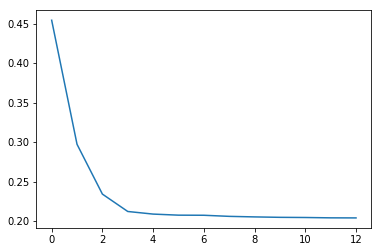

In [52]:
plt.plot(scores)

# Derivatives check

In [53]:
c = get_label_data("t10k-labels-idx1-ubyte")
y = get_feature_data("t10k-images-idx3-ubyte")

# Normalize to prevent overflow
y = normalize(y, axis=1)
y = np.matrix(y)
w = get_weight_matrix(y,c)

# The initial_guess could be the minimum given by the normal equations or random
initial_guess = w.T
y = y.T

h, c1, c2, c3 = verify_gradient(c,y,initial_guess)

O1 = [h_i for h_i in h]
O2 = [h_i**2 for h_i in h]
O3 = [h_i**3 for h_i in h]

## Finite difference 
O(n)

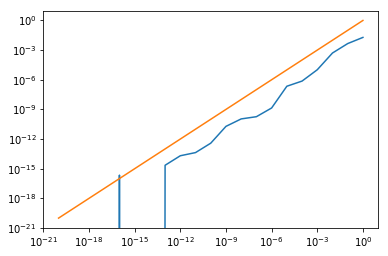

In [54]:
plt.loglog(h, c1, label="column 1")
plt.plot(h,O1)

## First derivative check
O(n^2)

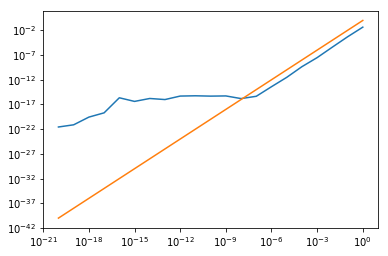

In [55]:
plt.loglog(h, c2, label="column 2")
plt.plot(h, O2)

## Second derivative check
O(n^3)

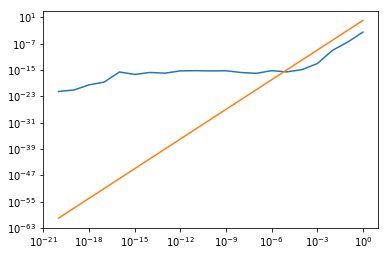

In [56]:
plt.loglog(h, c3, label="hessian check")
plt.plot(h, O3)